In [1]:
import glob
import re
import pandas as pd
import numpy as np
import calmap
from textstat.textstat import textstat
%matplotlib inline

## Tests

In [2]:
df = pd.read_csv('abcnews-date-text.csv')
df.dropna(how='any', inplace=True)

In [3]:
df.shape

(1082460, 2)

In [4]:
df['date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')

In [5]:
df.head()

,publish_date,headline_text,date
0,20030219,aba decides against community broadcasting lic...,2003-02-19
1,20030219,act fire witnesses must be aware of defamation,2003-02-19
2,20030219,a g calls for infrastructure protection summit,2003-02-19
3,20030219,air nz staff in aust strike for pay rise,2003-02-19
4,20030219,air nz strike to affect australian travellers,2003-02-19


In [6]:
df = df[df.date.dt.year == 2003]
df.head()

,publish_date,headline_text,date
0,20030219,aba decides against community broadcasting lic...,2003-02-19
1,20030219,act fire witnesses must be aware of defamation,2003-02-19
2,20030219,a g calls for infrastructure protection summit,2003-02-19
3,20030219,air nz staff in aust strike for pay rise,2003-02-19
4,20030219,air nz strike to affect australian travellers,2003-02-19


In [7]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(
    use_idf=False,
    norm='l1',
    vocabulary=emolex_df.word)
matrix = vec.fit_transform(df['headline_text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df['positive'] = wordcount_df[emolex_df[emolex_df['positive'] == 1]['word']].sum(axis=1, skipna=True)
df['negative'] = wordcount_df[emolex_df[emolex_df['negative'] == 1]['word']].sum(axis=1, skipna=True)

In [10]:
df.head()

,publish_date,headline_text,date,positive,negative
0,20030219,aba decides against community broadcasting lic...,2003-02-19,1.0,0.000000
1,20030219,act fire witnesses must be aware of defamation,2003-02-19,0.0,0.333333
2,20030219,a g calls for infrastructure protection summit,2003-02-19,0.0,0.333333
3,20030219,air nz staff in aust strike for pay rise,2003-02-19,0.2,0.200000
4,20030219,air nz strike to affect australian travellers,2003-02-19,0.0,0.500000


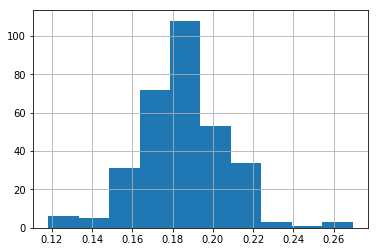

In [11]:
df.groupby([df.date.dt.year, df.date.dt.month, df.date.dt.day])['positive'].mean().hist()

## Negative weeks

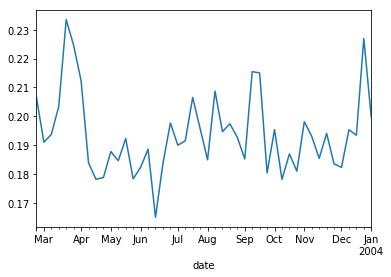

In [27]:
df.resample('W')['negative'].mean().plot()

## Negative days of the week

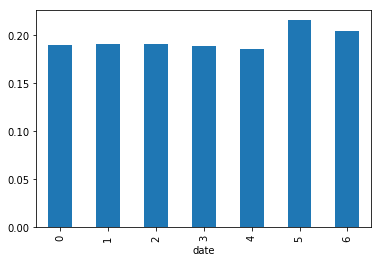

In [35]:
df.groupby([df.date.dt.dayofweek])['negative'].mean().plot(kind='bar')

In [13]:
df.index = df['date']

## News are more neutral on the weekend

/usr/local/lib/python3.6/site-packages/calmap/__init__.py:128: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
/usr/local/lib/python3.6/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


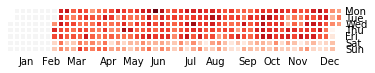

In [14]:
calmap.yearplot(df['positive'], year=2003)

/usr/local/lib/python3.6/site-packages/calmap/__init__.py:128: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
/usr/local/lib/python3.6/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


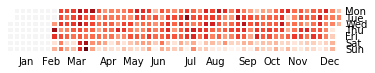

In [15]:
calmap.yearplot(df['negative'], year=2003)

## The Flesch Reading Ease formula

* 90-100 : Very Easy 
* 80-89 : Easy 
* 70-79 : Fairly Easy 
* 60-69 : Standard 
* 50-59 : Fairly Difficult 
* 30-49 : Difficult 
* 0-29 : Very Confusing

In [18]:
df['flesch_score'] = df['headline_text'].apply(lambda x: textstat.flesch_reading_ease(x))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


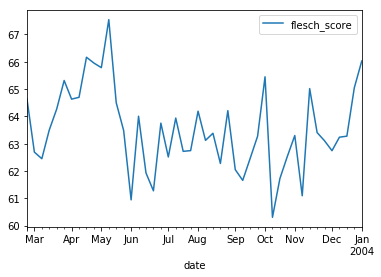

In [19]:
df.resample('W').plot(use_index=True, y='flesch_score')

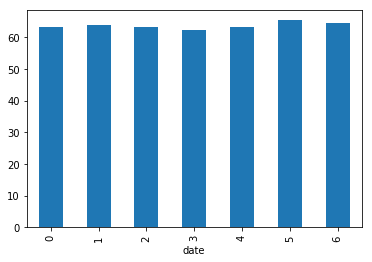

In [39]:
df.groupby([df.index.dayofweek])['flesch_score'].mean().plot(kind='bar')